# Intro

In [1]:
%load_ext autoreload
%autoreload 2
import LayoutBox as lb
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
import matplotlib
import matplotlib.gridspec as gridspec
def plot_children(ax, box, level=0):
    '''
    Simple plotting to show where boxes are
    '''
    import matplotlib.patches as patches
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    print("Level:", level)
    for child in box.children:
        rect = child.get_rect()
        print(child)
        ax.add_patch(
            patches.Rectangle(
                (child.left.value(), child.bottom.value()),   # (x,y)
                child.width.value(),          # width
                child.height.value(),          # height
                fc = 'none',
                ec = colors[level]
            )
        )
        if level%2 == 0:
            ax.text(child.left.value(), child.bottom.value(), child.name,
                   size=12-level, color=colors[level])
        else:
            ax.text(child.right.value(), child.top.value(), child.name, 
                    ha='right', va='top', size=12-level, color=colors[level])
        
        plot_children(ax, child, level=level+1)


/Users/jklymak/matplotlib/lib/matplotlib/style/core.py:197: UserWarning: In /Users/jklymak/.matplotlib/stylelib/ggplotjmk.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
fig0, axs = plt.subplots(2,6)
try:
    axs = axs.flatten()
except:
    axs = np.array([axs])
axx = fig0.add_axes([0,0,1,1])
axx.set_zorder(-1000)
pcm = axs[0].pcolormesh(np.random.rand(32,32))
# place the colorbar.  This will change size, but a good approx size is useful
for ax in axs.flatten():
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('AX')
# now lets do layout
figlb = lb.LayoutBox(parent=None, name='figlb')
figlb.set_geometry(0.,0.,1.,1.)

# make a container for the full gridspec.   In this case it has the 
# same size as the figure, but you can imagine cases where the parent
# is another layoutbox, and it has a smaller size
#
# We need this container so that all the axes inside the gridspec can 
# be shrunk to make room for the colorbar.
gslb = lb.LayoutBox(parent=figlb, name='gslb')
# simplify this a level
#gslb = figlb
# works.  So issue is with gslb being child of figlb...

sss = []
sslbs = []
axlbs = []
axspinelbs = []
for n,ax in enumerate(axs):
    print(n)
    sss += [ax.get_subplotspec().get_topmost_subplotspec()]
    print(sss[-1])
    # this is the container for the axis and anything attached to it
    sslbs += [gslb.layout_from_subplotspec(sss[-1], name='sslb%d'%n)]
    # this is th contaier for the axis itself
    axlbs += [lb.LayoutBox(parent=sslbs[-1], name='axlb%d'%n)]
    # this is the location needed for the spine.
    axspinelbs += [lb.LayoutBox(parent=axlbs[-1], name='axspinelb%d'%n)]



# now place the axes splines:

# place axis spines lbs inside their layout boxes
for ax, axspinelb in zip(axs, axspinelbs):
    pos = ax.get_position()
    fig = ax.get_figure()
    renderer = fig.canvas.get_renderer()
    invTransFig = fig.transFigure.inverted().transform_bbox
    bbox = invTransFig(ax.get_tightbbox(renderer=renderer))
    leftpad = 0.0; rightpad=0.00; bottompad=0.00; toppad=0.00
    axspinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
    axspinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
    axspinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
    axspinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)

#lb.match_margins(axspinelbs)

figlb.update_variables()
plot_children(axx, figlb)

for ax, axspinelb in zip(axs, axspinelbs):
    ax.set_position(axspinelb.get_rect())




0
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
1
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
2
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
3
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
4
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
5
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667
6
[0.16666666666666666, 0.33333333333333331, 0.5, 0.66666666666666663, 0.83333333333333326, 0.99999999999999989]
0.166666666667
0.166666666667

# simple colorbar layout

In [13]:
fig0, ax = plt.subplots()
axx = fig0.add_axes([0,0,1,1])
axx.set_zorder(-1000)
pcm = ax.pcolormesh(np.random.rand(32,32))
cbar = fig0.colorbar(pcm,ax=ax, label='Colorbar!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('AX')


# now lets do layout
figlb = lb.LayoutBox(parent=None, name='figlb', artist=fig0)
figlb.set_geometry(0.,0.,1.,1.)

ss = ax.get_subplotspec().get_topmost_subplotspec()
# this is the container for the axis and anything attached to it
sslb, axlb, axspinelb = figlb.layout_axis_subplotspec(ss, ax=ax)
cblb, cbspinelb = sslb.layout_axis_right(ax=cbar.ax)

figlb.place_children()

figlb.update_variables()

#cbar.ax.set_position(cbspinelb.get_rect())
#ax.set_position(axspinelb.get_rect())

print(figlb)

plot_children(axx,figlb)

print(figlb.children)

[1.0]
1.0
1.0


NameError: name 'hasmethod' is not defined

In [65]:
fig,axs = plt.subplots()
ax = fig.add_axes([0,0,1,1])
print(type(axs))
print(type(axs) is "<class 'matplotlib.axes._subplots.AxesSubplot'>")


/Users/jklymak/matplotlib/lib/matplotlib/pyplot.py:533: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<class 'matplotlib.axes._subplots.AxesSubplot'>
False


## Try multiple axes

In [1]:
fig0, axs = plt.subplots(4,4)
try:
    axs = axs.flatten()
except:
    axs = np.array([axs])
axx = fig0.add_axes([0,0,1,1])
axx.set_zorder(-1000)
pcm = axs[0].pcolormesh(np.random.rand(32,32))
# place the colorbar.  This will change size, but a good approx size is useful
cbax = fig0.add_axes([0.8,0.1,0.025,0.6])
cbar = fig0.colorbar(pcm, cax=cbax, label='Colorbar!')
for ax in axs.flatten():
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('AX')
# now lets do layout
figlb = lb.LayoutBox(parent=None, name='figlb')
figlb.set_geometry(0.,0.,1.,1.)

# make a container for the full gridspec.   In this case it has the 
# same size as the figure, but you can imagine cases where the parent
# is another layoutbox, and it has a smaller size
#
# We need this container so that all the axes inside the gridspec can 
# be shrunk to make room for the colorbar.
gslb = lb.LayoutBox(parent=figlb, name='gslb')

sss = []
sslbs = []
axlbs = []
axspinelbs = []
for n,ax in enumerate(axs):
    print(n)
    sss += [ax.get_subplotspec().get_topmost_subplotspec()]
    print(sss[-1])
    # this is the container for the axis and anything attached to it
    sslbs += [gslb.layout_from_subplotspec(sss[-1], name='sslb%d'%n)]
    # this is th contaier for the axis itself
    # this is necessary to make room for other axis hanger ons like colorbars.
    axlbs += [lb.LayoutBox(parent=sslbs[-1], name='axlb%d'%n)]
    # this is the location needed for the spine.
    axspinelbs += [lb.LayoutBox(parent=axlbs[-1], name='axspinelb%d'%n)]


# now colorbar lb
# this is the location of the colorbar axis...
cblb = lb.LayoutBox(parent=figlb, name='cblb')#, tight=True)
# this is the location for the colorbar spine
cbspinelb = lb.LayoutBox(parent=cblb, name='cbspinelb')
# decide lateral order
lb.hstack([gslb,cblb], padding=0.02)
# align the spine with the gridspec
cbspinelb.set_height(gslb.height*0.8)
lb.align([gslb,cbspinelb],'v_center')

# now set the width of the whole layout box based on the width of the 
# already plotted colorbar:
fig = cbar.ax.get_figure()
renderer = fig.canvas.get_renderer()
pos = cbar.ax.get_position()
invTransFig = fig.transFigure.inverted().transform_bbox
bbox = invTransFig(cbar.ax.get_tightbbox(renderer=renderer))

cblb.set_width(bbox.x1-bbox.x0)
#cblb.set_height(cblb.parent.height.value())

leftpad = 0.0; rightpad=0; bottompad=0.; toppad=0.0

cbspinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
cbspinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
cbspinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
cbspinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)


# now place the axes splines:

# place axis spines lbs inside their layout boxes
for ax, axspinelb in zip(axs, axspinelbs):
    pos = ax.get_position()
    invTransFig = fig.transFigure.inverted().transform_bbox
    bbox = invTransFig(ax.get_tightbbox(renderer=renderer))
    leftpad = 0.0; rightpad=0.00; bottompad=0.0; toppad=0.0
    axspinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
    axspinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
    axspinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
    axspinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)

lb.match_margins(axspinelbs)

figlb.update_variables()
plot_children(axx, figlb)

# now actually place the spines:
cbar.ax.set_position(cbspinelb.get_rect())
for ax, axspinelb in zip(axs, axspinelbs):
    ax.set_position(axspinelb.get_rect())




NameError: name 'plt' is not defined

In [25]:
        
    

# this is the location of the colorbar axis...
cblb = lb.LayoutBox(parent=sslb, name='cblb')#, tight=True)
# this is the location for the colorbar spine
cbspinelb = lb.LayoutBox(parent=cblb, name='cbspinelb')


# descide lateral order...
for axlb in axlbs:
    # this should put cblb to the right of all the axlbs
    lb.hstack([axlb,cblb], padding=0.03)

# need some way to figure this.  Just use original? 
cbspinelb.set_height(figlb.height*0.8)
lb.align([axspinelb,cbspinelb],'v_center')

fig = cbar.ax.get_figure()
renderer = fig.canvas.get_renderer()
pos = cbar.ax.get_position()
invTransFig = fig.transFigure.inverted().transform_bbox
bbox = invTransFig(cbar.ax.get_tightbbox(renderer=renderer))

print(bbox.x1-bbox.x0)
cblb.set_width(bbox.x1-bbox.x0)
cblb.set_height(axlb.height.value())

figlb.update_variables()

plot_children(axx, figlb)
  

/Users/jklymak/matplotlib/lib/matplotlib/pyplot.py:533: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
Widget Javascript not detected.  It may not be installed or enabled properly.


[0.33333333333333331, 0.66666666666666663, 1.0]
0.333333333333
0.333333333333
[-1 * figlb_left + 0 * figlb_width + 1 * sslb0_left + -0 == 0 | strength = 1.001e+09, -1 * figlb_bottom + 1 * sslb0_bottom + 0 * figlb_height + -0 == 0 | strength = 1.001e+09, 1 * sslb0_width + -0.333333 * figlb_width + 1e-06 == 0 | strength = 1.001e+09, 1 * sslb0_height + -1 * figlb_height + 1e-06 == 0 | strength = 1.001e+09]
[0.33333333333333331, 0.66666666666666663, 1.0]
0.333333333333
0.333333333333
[-1 * figlb_left + 1 * sslb1_left + -0.333333 * figlb_width + -0 == 0 | strength = 1.001e+09, -1 * figlb_bottom + 1 * sslb1_bottom + 0 * figlb_height + -0 == 0 | strength = 1.001e+09, 1 * sslb1_width + -0.333333 * figlb_width + 1e-06 == 0 | strength = 1.001e+09, 1 * sslb1_height + -1 * figlb_height + 1e-06 == 0 | strength = 1.001e+09]
[0.33333333333333331, 0.66666666666666663, 1.0]
0.333333333333
0.333333333333
[-1 * figlb_left + -0.666667 * figlb_width + 1 * sslb2_left + -0 == 0 | strength = 1.001e+09, -1 * f

NameError: name 'parent_constran' is not defined

In [11]:
    
cbspinelb.set_height(axspinelb.height*0.8)
lb.align([axspinelb,cbspinelb],'v_center')




# put_cbar
# this gets the width, and makes that set.  
fig = cbar.ax.get_figure()
renderer = fig.canvas.get_renderer()
pos = cbar.ax.get_position()
invTransFig = fig.transFigure.inverted().transform_bbox
bbox = invTransFig(cbar.ax.get_tightbbox(renderer=renderer))

cblb.set_width(bbox.x1-bbox.x0)
cblb.set_height(axlb.height.value())

leftpad = 0; rightpad=0; bottompad=0.; toppad=0.

cbspinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
cbspinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
cbspinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
cbspinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)


# place axis
pos = ax.get_position()
invTransFig = fig.transFigure.inverted().transform_bbox
bbox = invTransFig(ax.get_tightbbox(renderer=renderer))
leftpad = 0; rightpad=0; bottompad=0.; toppad=0.
axspinelb.set_left_margin_min(-bbox.x0+pos.x0+leftpad)
axspinelb.set_right_margin_min(bbox.x1-pos.x1+rightpad)
axspinelb.set_bottom_margin_min(-bbox.y0+pos.y0+bottompad)
axspinelb.set_top_margin_min(bbox.y1-pos.y1+toppad)



figlb.update_variables()
cbar.ax.set_position(cbspinelb.get_rect())
ax.set_position(axspinelb.get_rect())

print(figlb)

plot_children(axx,figlb)

Widget Javascript not detected.  It may not be installed or enabled properly.


## Some random layouts

<IPython.core.display.Javascript object>


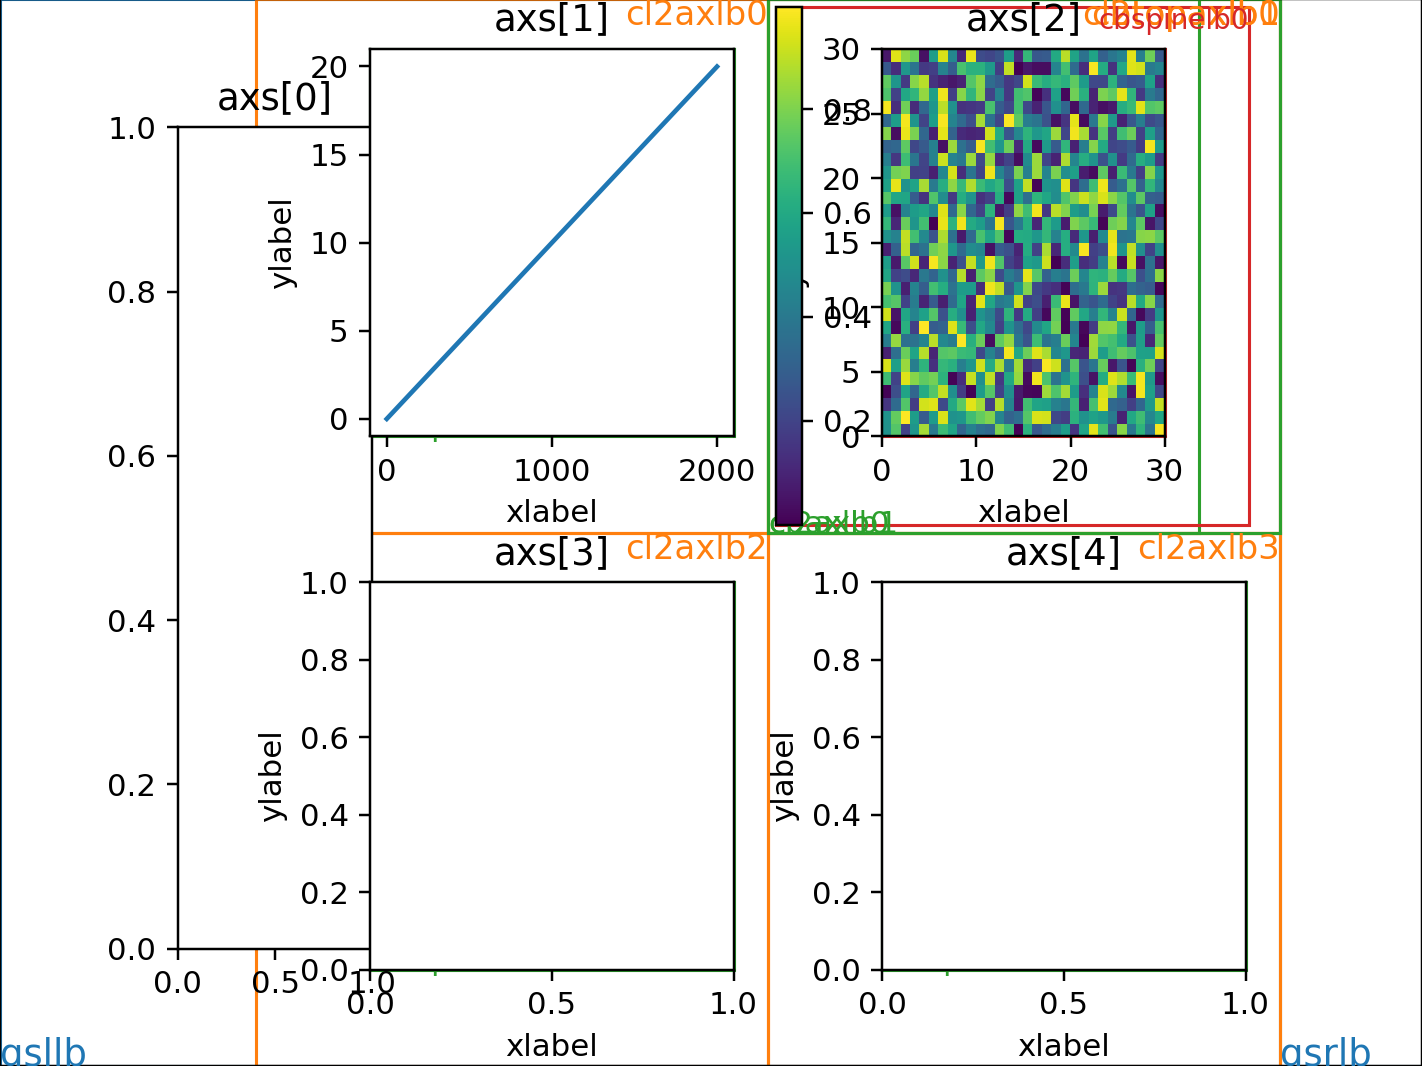

LayoutBox: figlb, (left: -5000000000.00) (bot: -5000000000.00) (right: 5000000000.00) (top: 5000000000.00)
Level: 0
Level: 0
the same=!
different!
LayoutBox: cl2topaxlb1, (left: 0.54) (bot: 0.50) (right: 0.90) (top: 1.00)
LayoutBox: cl2axlb1, (left: 0.54) (bot: 0.50) (right: 0.90) (top: 1.00)
(1, 2, 0, None)
(2, 3, 2, 2)
the same=!
the same=!
different!
LayoutBox: cbtopaxlb0, (left: 0.54) (bot: 0.50) (right: 0.90) (top: 1.00)
LayoutBox: cbaxlb0, (left: 0.54) (bot: 0.50) (right: 0.90) (top: 1.00)
(3, 1, 1, None)
(2, 3, 2, 2)
Level: 0
LayoutBox: gsllb, (left: -0.00) (bot: 0.00) (right: 0.90) (top: 1.00)
Level: 1
LayoutBox: cl2axlb0, (left: 0.18) (bot: 0.50) (right: 0.54) (top: 1.00)
Level: 2
LayoutBox: cl2spinelb0, (left: 0.26) (bot: 0.59) (right: 0.52) (top: 0.95)
Level: 3
LayoutBox: cl2topaxlb1, (left: 0.54) (bot: 0.50) (right: 0.90) (top: 1.00)
Level: 2
LayoutBox: cl2axlb1, (left: 0.54) (bot: 0.50) (right: 0.84) (top: 1.00)
Level: 3
LayoutBox: cl2spinelb1, (left: 0.62) (bot: 0.59) (ri

In [6]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
ax00 = fig.add_axes([0,0,1.,1.])
ax00.set_xlim([0.,1.])

figlb = lb.LayoutBox(parent=None, name='figlb')
print(figlb)
figlb.set_geometry(0,0,1,1)

nrows = 2
ncols = 3
gsl = gridspec.GridSpec(nrows, ncols, width_ratios=[1.,2.,2.])
# this is the lb for gs0[0]
#gsllb = figlb.layout_from_subplotspec(gs0[0], name='gsllb')

#gsr = gridspec.GridSpecFromSubplotSpec(nrows, ncols, gs0[1])
# this is the lb for gs0[1]
#gsrlb = figlb.layout_from_subplotspec(gs0[1], name='gsrlb')

figlb.update_variables()
plot_children(ax00, figlb)

if 1:

    if 1:

        axs = []
        axs += [fig.add_subplot(gsl[:,0])]
        axs[0].set_title('axs[0]')
        axs[0].set_visible(True)
    figlb.update_variables()
    
    if 1:
        n = 0
        for i in range(2):
            for j in range(2):
                n += 1
                axs += [fig.add_subplot(gsl[i,j+1])]
                #axlbs += [gsllb.layout_from_subplotspec(gsl[i, j+1], name='axslb%d'%n)]

                axs[-1].set_title('axs[%d]'%n)
                axs[-1].set_xlabel('xlabel')
                axs[-1].set_ylabel('ylabel')
                axs[-1].set_visible(True)
        axs[1].plot(np.arange(2000),np.arange(2000)/100.)
        pcm=axs[2].pcolormesh(np.random.rand(30,30))
        cbax=fig.colorbar(pcm,ax=axs[2])
        figlb.update_variables()
        plot_children(ax00, figlb)
        ax00.set_xlim([0.,1.])

# OK, here we have a nicely plotted figure.  But now we want to add a colorbar to the right of them all and
# steal space from the existing axes...
gsllb = lb.LayoutBox(parent=figlb, tight=False, name='gsllb')
gslrb = lb.LayoutBox(parent=figlb, tight=True, name='gsrlb')
lb.hstack([gsllb,gslrb])
gslrb.set_width(0.1)
#lb.constrained_layout(fig, parent=gsllb, axs=axs[0],  name='boo')
lb.constrained_layout(fig, parent=gsllb, axs=axs[1:],  name='cl2')
lb.constrained_layout(fig, parent=gsllb, axs=cbax.ax,  name='cb')
plot_children(ax00, figlb)


<IPython.core.display.Javascript object>


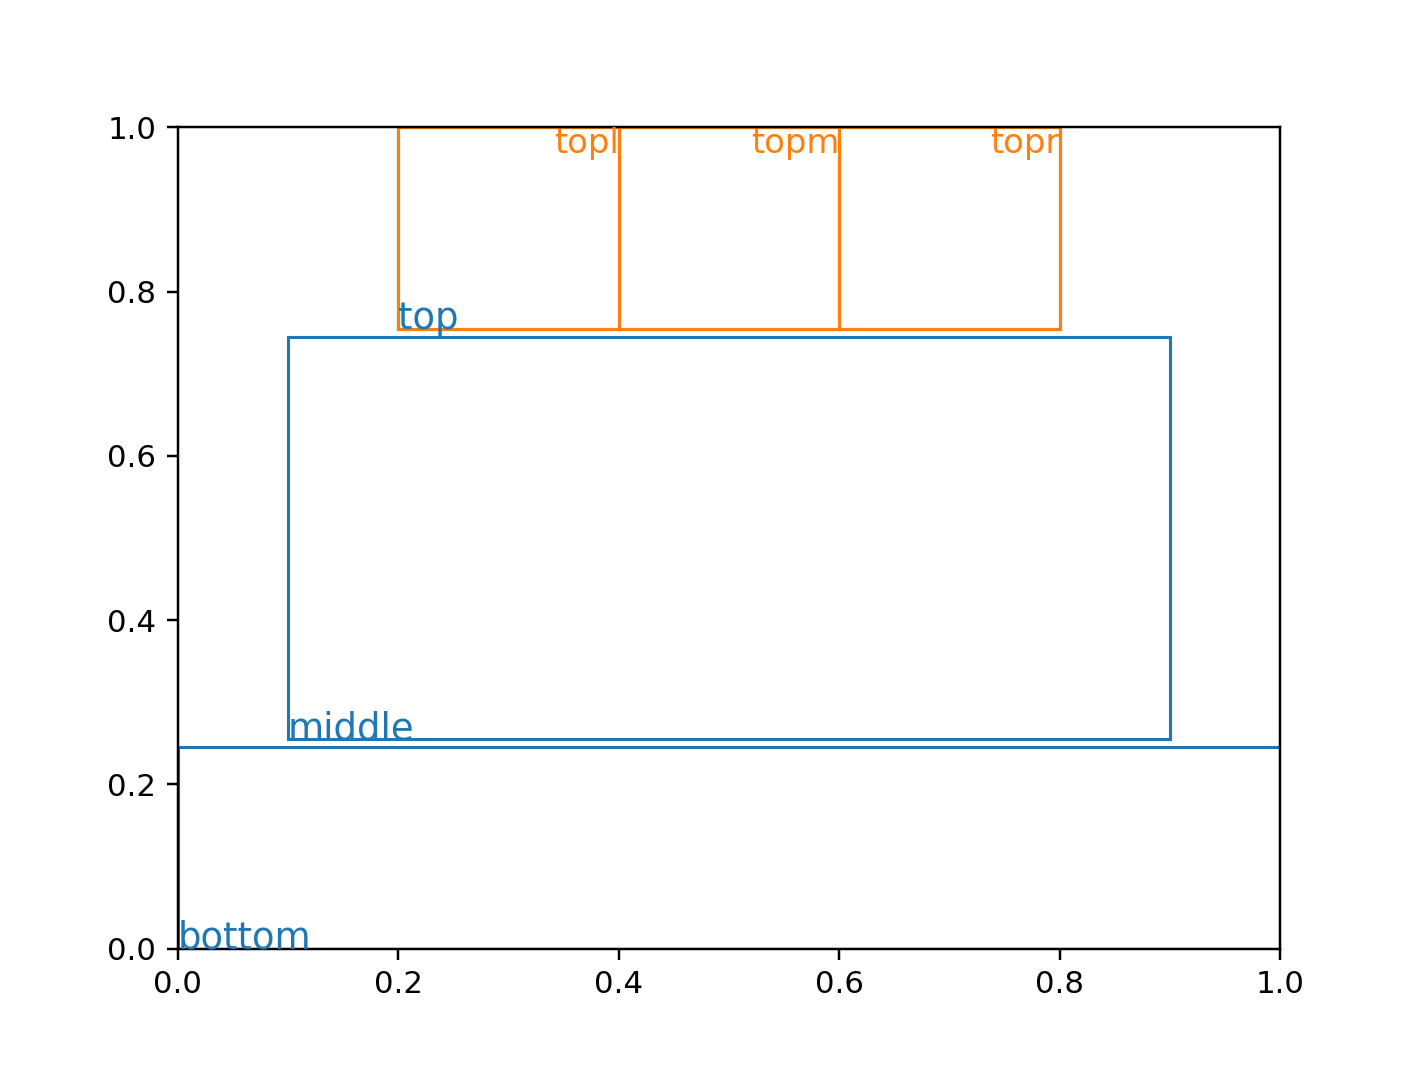

Level: 0
LayoutBox: top, (left: 0.20) (bot: 0.76) (right: 0.80) (top: 1.00)
Level: 1
LayoutBox: topl, (left: 0.20) (bot: 0.76) (right: 0.40) (top: 1.00)
Level: 2
LayoutBox: topm, (left: 0.40) (bot: 0.76) (right: 0.60) (top: 1.00)
Level: 2
LayoutBox: topr, (left: 0.60) (bot: 0.76) (right: 0.80) (top: 1.00)
Level: 2
LayoutBox: middle, (left: 0.10) (bot: 0.26) (right: 0.90) (top: 0.74)
Level: 1
LayoutBox: bottom, (left: 0.00) (bot: 0.00) (right: 1.00) (top: 0.24)
Level: 1


In [2]:
fig = lb.LayoutBox(parent=None, name='fig', tight=True)
fig.set_geometry(0,0,1.,1.)

top = lb.LayoutBox(parent=fig, name='top')
middle = lb.LayoutBox(parent=fig, name='middle')
bottom = lb.LayoutBox(parent=fig, name='bottom')

# stack these with height ratios 1, 2, 1
lb.vstackeq([top, middle, bottom], 
            height_ratios=[1.,2.,1.], padding = 0.01)

#middle.set_height(0.2)

#middle.set_bottom(0.3)

middle.set_left(0.1)
top.set_left_margin(0.2)
top.set_right_margin(0.2)

lb.align([top,middle],'h_center')

topl = lb.LayoutBox(parent=top, name='topl')
topm = lb.LayoutBox(parent=top, name='topm')
topr = lb.LayoutBox(parent=top, name='topr')

lb.hstackeq([topl,topm,topr])

bottom.update_variables()


f,ax = plt.subplots()
plot_children(ax, fig)

## Potential subplot layout

So a major goal of this is to be able to figure out the difference between the spine of an axis (`ax.get_position`) and it's bounding box (`ax.get_tight_bbox`) and then change the position of the spines so there is room inside the gridspec for the bbox.  

Here we call `set_bottom_margin_min` for a few of the axes, but use different values.  Then we call `lb.match_margins` on a list of axes, and they all have the same margins with the margin size set by the largest margin needed by the list of axes.  


In [3]:
import matplotlib.gridspec as gridspec
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.7], width_ratios=[1.,2.,1.])

# we will *not* use the gs to make the subplots
#fig,ax = plt.subplots()

figL = lb.LayoutBox(parent=None, name='fig', tight=True)
figL.set_geometry(0,0,1.,1.)

sp1 = figL.layout_from_gridspec(gs[:,0], name='sp1')
sp2 = figL.layout_from_gridspec(gs[0,1], name='sp2')
sp3 = figL.layout_from_gridspec(gs[0,2], name='sp3')
sp4 = figL.layout_from_gridspec(gs[1,1], name='sp4')
sp5 = figL.layout_from_gridspec(gs[1,2], name='sp5')

ax1 = lb.LayoutBox(parent=sp1, name='ax1')
ax1.set_bottom_margin_min(0.01)
ax1.set_left_margin_min(0.01)
ax1.update_variables()

ax2 = lb.LayoutBox(parent=sp2, name='ax2')
ax2.set_bottom_margin_min(0.04)
ax2.set_left_margin_min(0.04)

ax3 = lb.LayoutBox(parent=sp3, name='ax3')
ax4 = lb.LayoutBox(parent=sp4, name='ax4')
ax4.set_top_margin(0.05)
ax5 = lb.LayoutBox(parent=sp5, name='ax5')

ax5.set_right_margin(0.02)

lb.match_margins([ax1,ax2, ax3, ax4, ax5])

#lb.match_bottom_margins([ax1, ax2, ax3, ax4, ax5])


ax2.update_variables()



fig, ax = plt.subplots()
plot_children(ax, figL)
print(ax5.get_rect())
print(ax5.__repr__())

AttributeError: 'LayoutBox' object has no attribute 'layout_from_gridspec'

## example of using layout to constrain axes to match

despite different sized and located axes.

We will do this backwards using the existing layout as a guide.

In [4]:
fig = plt.figure()
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.5], width_ratios=[0.5,1.,1.])

axs = []
axs += [fig.add_subplot(gs[:,0])]
axs[0].set_title('axs[0]')
n = 0
for i in range(2):
    for j in range(2):
        n += 1
        axs += [fig.add_subplot(gs[i,j+1])]
        axs[-1].set_title('axs[%d]'%n)
        axs[-1].set_xlabel('xlabel')
        axs[-1].set_ylabel('ylabel')

axs[1].plot(np.arange(2000),np.arange(2000)/100.)
axs[2].plot(np.arange(2000))


axs[3].yaxis.set_ticks_position('right')
axs[3].yaxis.set_label_position("right")
# OK, now fix.  Note fig.tight_layout will fix as well.
# fig.tight_layout()


# by calling this multiple times, only the axes in the list are matched wrt their margins
lb.constrained_layout(fig,axs[0])
lb.constrained_layout(fig,axs[1:], toppad=0.015)

#constrained_layout(fig,axs[1:3], rightpad=0.01, leftpad=0.01)
#constrained_layout(fig,axs[3], toppad=0.01, leftpad=0.02)
#constrained_layout(fig,axs[-1],pad=0.05)

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'get_subplotspec'

### as before, but even more options to constrained_layout

In [5]:
fig = plt.figure()
nrows = 2
ncols = 3
gs = gridspec.GridSpec(nrows, ncols, height_ratios=[1.,0.5], width_ratios=[0.5,1.,1.])

axs = []
axs += [fig.add_subplot(gs[:,0])]
axs[0].set_title('axs[0]')
n = 0
for i in range(2):
    for j in range(2):
        n += 1
        axs += [fig.add_subplot(gs[i,j+1])]
        axs[-1].set_title('axs[%d]'%n)
        axs[-1].set_xlabel('xlabel')
        axs[-1].set_ylabel('ylabel')

axs[1].plot(np.arange(2000),np.arange(2000)/100.)
axs[2].plot(np.arange(2000))


axs[3].yaxis.set_ticks_position('right')
axs[3].yaxis.set_label_position("right")
# OK, now fix.  Note fig.tight_layout will fix as well.
# fig.tight_layout()

# by calling this multiple times, only the axes in the list are matched wrt their margins
lb.constrained_layout(fig,axs[0])
lb.constrained_layout(fig,axs[1:3], rightpad=0.01, leftpad=0.01)
lb.constrained_layout(fig,axs[3], toppad=0.01, leftpad=0.02)
lb.constrained_layout(fig,axs[-1],pad=0.05)

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'get_subplotspec'

## Handling nested gridspec

I don't think the above handles a nested gridspec

In [25]:
ax = axs[0]
ss = ax.get_subplotspec()
topspec = ss.get_topmost_subplotspec()
print(topspec.get_topmost_subplotspec())
print(ss)
print(topspec)

In [15]:
import matplotlib
isinstance(fig, matplotlib.figure.Figure)

True

In [38]:
gsllb.update_variables()
gsllb.parent
axlbs[0].parent

LayoutBox: gsllb, (left: 0.00) (bot: 0.00) (right: 0.83) (top: 1.00)

In [25]:
import matplotlib
print(isinstance(gsl[i, j+1],matplotlib.gridspec.SubplotSpec))

True


In [31]:
ax = axs[2]
ss = ax.get_subplotspec()
print(ss)
print(ss.get_topmost_subplotspec())

In [67]:
cbar.config_axis()

## Testing layout_from_subplotspec



<IPython.core.display.Javascript object>


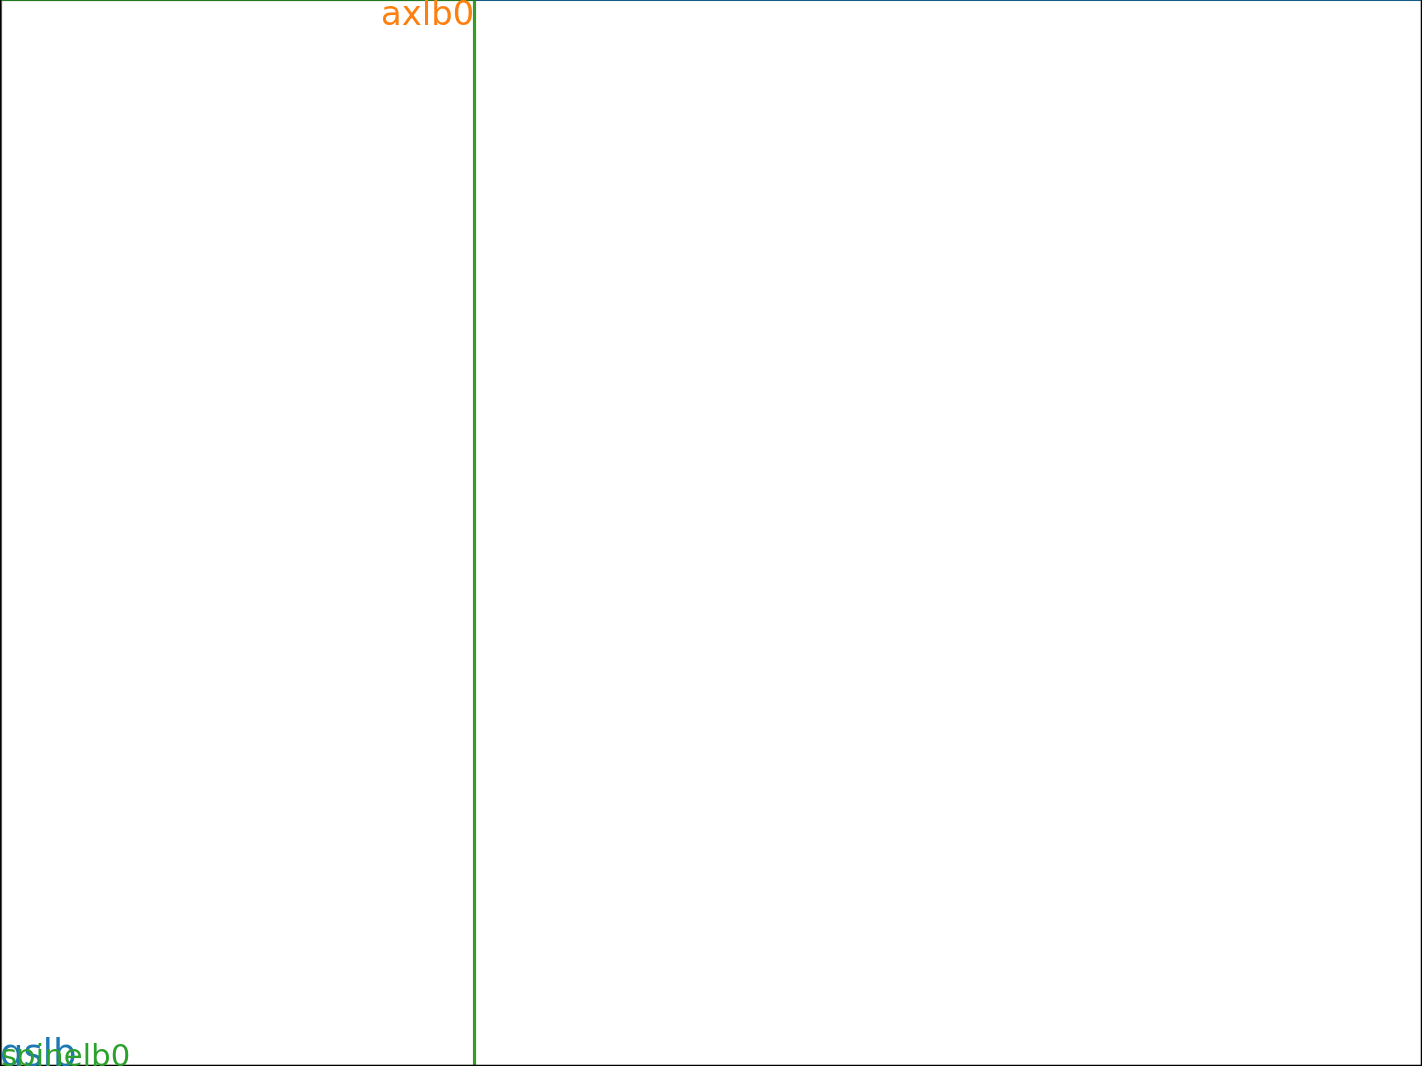

[0.33333333333333331, 0.66666666666666663, 1.0]
0.333333333333
0.333333333333
[1 * axlb0_left + 0 * gslb_width + -1 * gslb_left + -0 == 0 | strength = 1.001e+09, 1 * axlb0_bottom + 0 * gslb_height + -1 * gslb_bottom + -0 == 0 | strength = 1.001e+09, 1 * axlb0_width + -0.333333 * gslb_width + 1e-06 == 0 | strength = 1.001e+09, 1 * axlb0_height + -1 * gslb_height + 1e-06 == 0 | strength = 1.001e+09]
Level: 0
LayoutBox: gslb, (left: 0.00) (bot: 0.00) (right: 1.00) (top: 1.00)
Level: 1
LayoutBox: axlb0, (left: 0.00) (bot: 0.00) (right: 0.33) (top: 1.00)
Level: 2
LayoutBox: spinelb0, (left: 0.00) (bot: 0.00) (right: 0.33) (top: 1.00)
Level: 3


In [30]:
fig0, axx = plt.subplots()
axx.set_position([0,0,1,1])
axx.set_zorder(-1000)

def setuplbs():
    figlb = lb.LayoutBox(parent=None, name='figlb')
    figlb.set_geometry(0.,0.,1.,1)

    # now lets make a gridspec...
    gs = gridspec.GridSpec(2,3)
    gslb = lb.LayoutBox(parent=figlb, name='gslb')
    gslb.set_geometry_soft(0.,0.,1.,1)


    ss = gs[:,0]
    ax=fig0.add_subplot(ss)
    ax.set_visible(False)
    axlb = gslb.layout_from_subplotspec(ss,'axlb0')
    spinelb = lb.LayoutBox(parent=axlb, name='spinelb0')

    return figlb, gslb, axlb, spinelb

figlb, gslb, axlb, spinelb = setuplbs()
figlb.update_variables()
plot_children(axx, figlb)


<IPython.core.display.Javascript object>


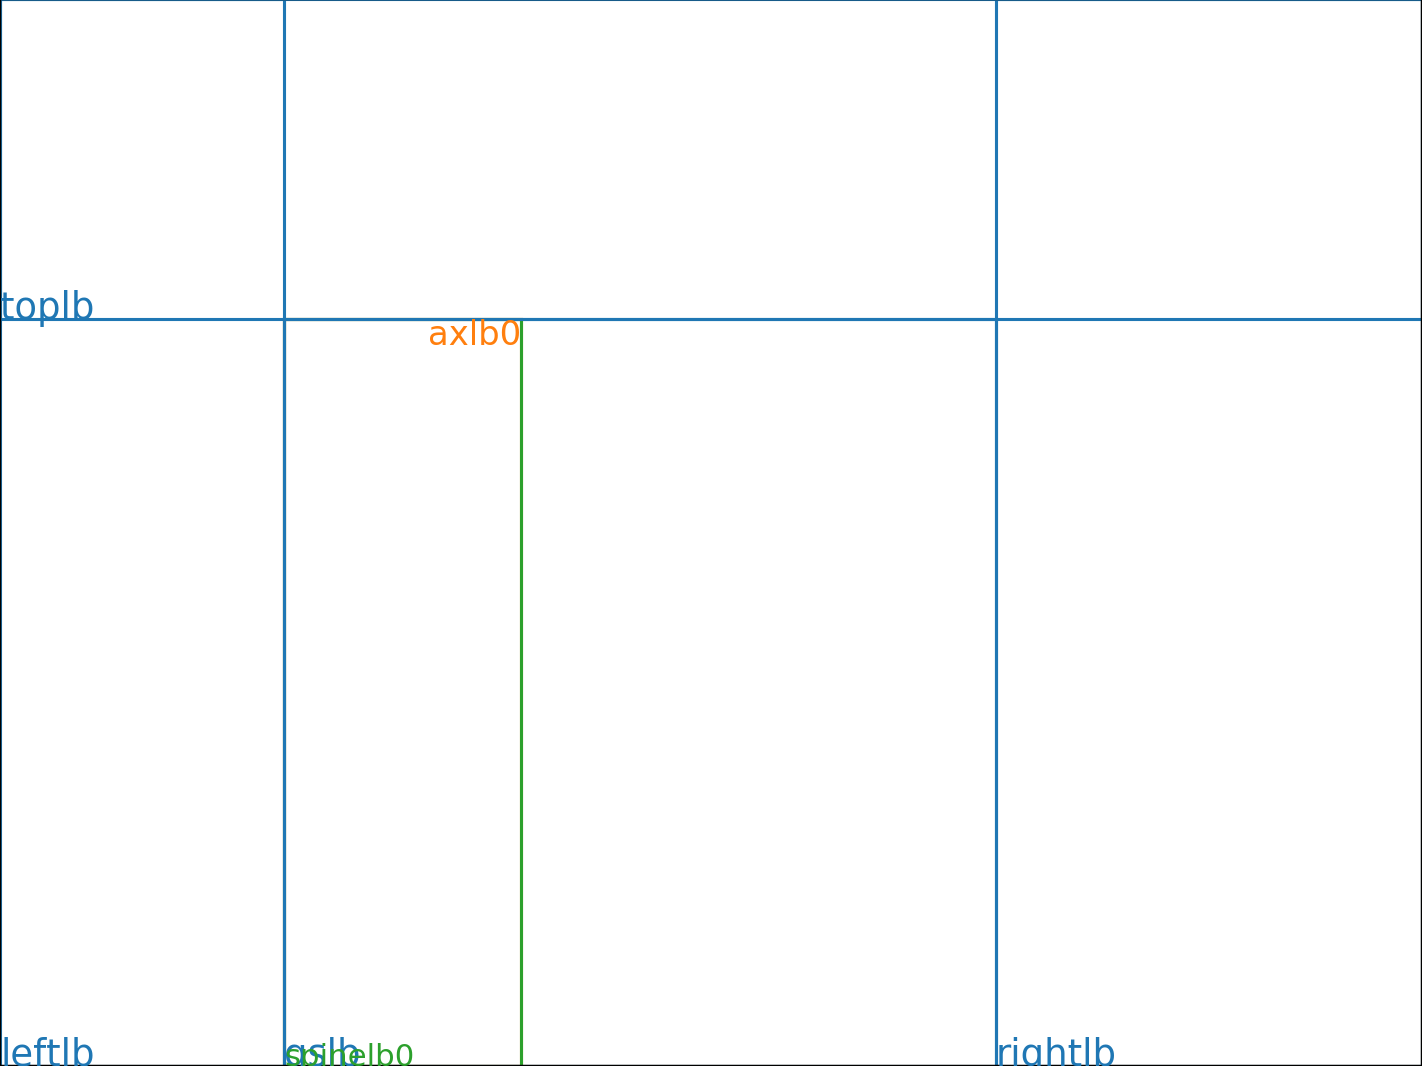

[0.33333333333333331, 0.66666666666666663, 1.0]
0.333333333333
0.333333333333
[1 * axlb0_left + 0 * gslb_width + -1 * gslb_left + -0 == 0 | strength = 1.001e+09, 1 * axlb0_bottom + -1 * gslb_bottom + 0 * gslb_height + -0 == 0 | strength = 1.001e+09, 1 * axlb0_width + -0.333333 * gslb_width + 1e-06 == 0 | strength = 1.001e+09, 1 * axlb0_height + -1 * gslb_height + 1e-06 == 0 | strength = 1.001e+09]
Level: 0
LayoutBox: gslb, (left: 0.20) (bot: 0.00) (right: 0.70) (top: 0.70)
Level: 1
LayoutBox: axlb0, (left: 0.20) (bot: 0.00) (right: 0.37) (top: 0.70)
Level: 2
LayoutBox: spinelb0, (left: 0.20) (bot: 0.00) (right: 0.37) (top: 0.70)
Level: 3
LayoutBox: rightlb, (left: 0.70) (bot: 0.00) (right: 1.00) (top: 1.00)
Level: 1
LayoutBox: leftlb, (left: 0.00) (bot: 0.00) (right: 0.20) (top: 1.00)
Level: 1
LayoutBox: toplb, (left: 0.00) (bot: 0.70) (right: 1.00) (top: 1.00)
Level: 1


In [34]:
# Do again, but now change gslb:
fig0, axx = plt.subplots()
axx.set_position([0,0,1,1])
axx.set_zorder(-1000)


figlb, gslb, axlb, spinelb = setuplbs()

rightlb = lb.LayoutBox(parent=figlb, name='rightlb')
rightlb.set_geometry(0.7,0.0,1.,1.)

leftlb = lb.LayoutBox(parent=figlb, name='leftlb')
leftlb.set_geometry(0.,0.,0.2,1.)

toplb = lb.LayoutBox(parent=figlb, name='toplb')
toplb.set_geometry(0.0,0.7,1.,1.)

lb.hstack([leftlb,gslb,rightlb])
lb.vstack([toplb,gslb])

figlb.update_variables()

plot_children(axx, figlb)

What causes us problems?  If we lay out something with colorbars, we don't have a good systematic way to know what axis they belong to or vice versa.  This seems an architecture problem.   

Maybe we can get at via subplotspec?  Seems a pain.

In [25]:
fig, ax = plt.subplots()

pcm = ax.pcolormesh(np.random.rand(32,32))
cbar = fig.colorbar(pcm, ax=ax)

In [26]:
print(cbar.mappable.axes)
print(cbar.ax.get_subplotspec() )
ss = cbar.ax.get_subplotspec()
print(ss.get_topmost_subplotspec() )
hasattr(cbar.ax,'get_subplotspec')

Axes(0.125,0.11;0.62x0.77)


True

In [30]:
fig, axs = plt.subplots(2,2)

pcm = axs[0,0].pcolormesh(np.random.rand(32,32))
cbar = fig.colorbar(pcm, ax=axs)
print(cbar.mappable.axes)
print(hasattr(cbar.ax,'get_subplotspec'))
#print(cbar.ax.get_subplotspec() )

print(cbar.mappable.axes.get_subplotspec().get_gridspec())

Axes(0.125,0.53;0.281818x0.35)
False


In [23]:
print(cbar.ax.

In [4]:
print(fig0.axes)

[<matplotlib.axes._subplots.AxesSubplot object at 0x111ed10b8>, <matplotlib.axes._subplots.AxesSubplot object at 0x111f47208>, <matplotlib.axes._subplots.AxesSubplot object at 0x111f84208>, <matplotlib.axes._subplots.AxesSubplot object at 0x111fb34a8>, <matplotlib.axes._subplots.AxesSubplot object at 0x111fee470>, <matplotlib.axes._subplots.AxesSubplot object at 0x112025898>, <matplotlib.axes._subplots.AxesSubplot object at 0x11205d898>, <matplotlib.axes._subplots.AxesSubplot object at 0x112095780>, <matplotlib.axes._subplots.AxesSubplot object at 0x1120bdc50>, <matplotlib.axes._subplots.AxesSubplot object at 0x1120f8a58>, <matplotlib.axes._subplots.AxesSubplot object at 0x112130a58>, <matplotlib.axes._subplots.AxesSubplot object at 0x112169ac8>, <matplotlib.axes._axes.Axes object at 0x111ef6630>]
